In [38]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install tensorflow

In [40]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [42]:
moisture_data = pd.read_csv("plant_vase1(2).csv")

In [43]:
moisture_data.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False


In [44]:
import keras.backend as K

In [45]:
columns = ['year', 'month', 'day', 'hour', 'minute', 'moisture0', 'moisture1', 'moisture2']
predict = ['moisture3']

In [46]:
train_size = 4250
test_size = 750

In [47]:
def sum_error(y_true, y_pred):
        return K.sum(K.abs(y_pred - y_true))

In [48]:
K.eval(K.sum(K.abs(np.array([0,3]) - np.array([2,5]))))

4

In [49]:
moisture_data

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2020,3,9,23,43,52,0.17,0.39,0.52,0.12,0.03,False
4405,2020,3,9,23,44,52,0.17,0.39,0.52,0.12,0.03,False
4406,2020,3,9,23,45,52,0.17,0.39,0.52,0.12,0.03,False
4407,2020,3,9,23,46,52,0.17,0.39,0.52,0.12,0.03,False


<AxesSubplot:>

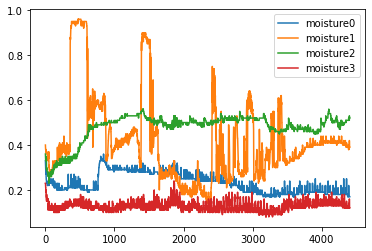

In [50]:
moisture_data[['moisture0','moisture1','moisture2','moisture3']].plot()

In [51]:
X_train = moisture_data[columns][:train_size]
Y_train = moisture_data[predict][:train_size]
X_test = moisture_data[columns][train_size:]
Y_test = moisture_data[predict][train_size:]

In [52]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=len(columns), input_shape=(len(columns),), activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=len(predict), input_shape=(len(columns),)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss=sum_error, metrics=['MSE'])

In [54]:
model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
133/133 [==============================] - 0s 962us/step - loss: 9125.9473 - MSE: 152996.8438
Epoch 2/10
133/133 [==============================] - 0s 977us/step - loss: 4565.6821 - MSE: 64649.0352
Epoch 3/10
133/133 [==============================] - 0s 993us/step - loss: 4114.9883 - MSE: 53108.5781
Epoch 4/10
133/133 [==============================] - 0s 947us/step - loss: 3569.2964 - MSE: 40979.7773
Epoch 5/10
133/133 [==============================] - 0s 887us/step - loss: 3070.1301 - MSE: 31148.5254
Epoch 6/10
133/133 [==============================] - 0s 1ms/step - loss: 2761.2327 - MSE: 25274.2266
Epoch 7/10
133/133 [==============================] - 0s 1ms/step - loss: 2247.2546 - MSE: 17619.9102
Epoch 8/10
133/133 [==============================] - 0s 1ms/step - loss: 1908.2728 - MSE: 12966.2949
Epoch 9/10
133/133 [==============================] - 0s 924us/step - loss: 1570.9530 - MSE: 9078.6318
Epoch 10/10
133/133 [==============================] - 0s 1ms/step - l

In [55]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 1ms/step - loss: 36.8726 - MSE: 1.4565


[36.87257385253906, 1.4564520120620728]

In [56]:
weights = np.array(model.get_weights())

C:\Users\SANDEE~1\AppData\Local\Temp/ipykernel_22168/4225249613.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(model.get_weights())


In [57]:
model.get_weights()

[array([[ 0.13159685, -0.01156985,  0.00783618,  0.23189564, -0.00353721,
         -0.44167557,  0.01300421,  0.2365989 ],
        [-0.65972495,  0.16306204,  0.29508945,  0.25248343, -0.5040245 ,
          0.2464577 , -0.8433954 , -0.7354062 ],
        [-0.63215655,  0.22339487, -0.6925118 ,  0.27855045, -0.32620853,
          0.41316718, -0.59460384, -0.5960428 ],
        [-0.12243572,  0.5396652 ,  0.37902534, -0.66522413, -0.12802161,
         -0.2434921 , -0.15891781, -0.741953  ],
        [ 0.23680395, -0.3388904 , -0.08880275, -0.5595521 , -0.11091253,
          0.27700198, -0.3321855 ,  0.1409921 ],
        [ 0.02805643,  0.4275185 ,  0.22858886, -0.28986725, -0.13359742,
          0.52693564, -0.15890267, -0.4941491 ],
        [-0.35610098, -0.28398582, -0.29292798, -0.4735897 ,  0.4767257 ,
         -0.5996637 , -0.7187372 ,  0.01010323],
        [-0.5910294 , -0.2798539 ,  0.24946876,  0.33515316,  0.32283172,
          0.2592237 , -0.09833385, -0.6612415 ]], dtype=float32),

In [58]:
Y_test.to_numpy()[58]

array([0.13])

In [59]:
prediction = model.predict(X_test.to_numpy())

In [60]:
count = 0
for i in range(len(X_test)):
    if np.abs(prediction[i][0] - Y_test.to_numpy()[i]) > 0.1:
        count += 1
print(count/len(X_test))

0.9811320754716981


In [61]:
prediction.all()

True